In [1]:
"""

Java/HDFS logs

t1 INFO added user abc
t2 ERROR deleted user xyz

Elastic search

t1 | INFO | added user abc
t2 | ERROR | deleted user xyz

ML 

Events

event_id | event
e1 | added user <>
e2 | deleted user <>


Logs

0-5 mins - tw1
t1 | INFO | added user 1
t2 | ERROR | deleted user 2
t3 | INFO | added user 3
t4 | ERROR | deleted user 4
t5 | INFO | added user 5


6-10 mins
t6 | ERROR | deleted user 6
t7 | INFO | added user 7
t8 | ERROR | deleted user 8

11-15 mins
t9 | INFO | added user 9
t10 | ERROR | deleted user 0


Log_summary


time_window_id | count_info | count_error | count_e1 | count_e2
tw1 | 3 | 2 | 3 | 2
tw2 | 1 | 2 | 1 | 2
tw3 | 1 | 1 | 1 | 1

"""

'\n\nJava/HDFS logs\n\nt1 INFO added user abc\nt2 ERROR deleted user xyz\n\nElastic search\n\nt1 | INFO | added user abc\nt2 | ERROR | deleted user xyz\n\nML \n\nEvents\n\nevent_id | event\ne1 | added user <>\ne2 | deleted user <>\n\n\nLogs\n\n0-5 mins - tw1\nt1 | INFO | added user 1\nt2 | ERROR | deleted user 2\nt3 | INFO | added user 3\nt4 | ERROR | deleted user 4\nt5 | INFO | added user 5\n\n\n6-10 mins\nt6 | ERROR | deleted user 6\nt7 | INFO | added user 7\nt8 | ERROR | deleted user 8\n\n11-15 mins\nt9 | INFO | added user 9\nt10 | ERROR | deleted user 0\n\n\nLog_summary\n\n\ntime_window_id | count_info | count_error | count_e1 | count_e2\ntw1 | 3 | 2 | 3 | 2\ntw2 | 1 | 2 | 1 | 2\ntw3 | 1 | 1 | 1 | 1\n\n'

In [ ]:
# To do - Read data from elastic based on start time and end time and write to log file

In [19]:
import pandas as pd
import os
import numpy as np
import re
from sklearn.utils import shuffle
from collections import OrderedDict
import sys
sys.path.append('../')
from log_parser import Drain

log_file_path = 'data/unstructured/Java/'
#label_file_name = 'data/unstructured/HDFS/anomaly_label.csv'
unstructured_log_filename = 'application.log'
structured_log_file_path = 'data/structured/Java/'
structured_log_filename = 'application.log_structured.csv'


def parseLog(log_file_path, log_file_name, structured_log_file_path, log_type):
    if log_type == 'HDFS':
        log_format = '<Date> <Time> <Pid> <Level> <Component>: <Content>'
        
    if log_type == 'Java':
        log_format = '<Date> <Time> <Pid> <Level> <Component> - <Content>'

    # Regular expression list for optional preprocessing (default: [])
    regex      = [
        r'blk_(|-)[0-9]+' , # block id
        r'(/|)([0-9]+\.){3}[0-9]+(:[0-9]+|)(:|)', # IP
        r'(?<=[^A-Za-z0-9])(\-?\+?\d+)(?=[^A-Za-z0-9])|[0-9]+$', # Numbers
    ]
    st         = 0.5  # Similarity threshold
    depth      = 4  # Depth of all leaf nodes

    parser = Drain.LogParser(log_format, indir=log_file_path, outdir=structured_log_file_path,  depth=depth, st=st, rex=regex)
    parser.parse(log_file_name)

## parse the logs - convert unstructured to structured log
parseLog(log_file_path, unstructured_log_filename, structured_log_file_path, 'Java')
    

## read structured log 
print("Loading", structured_log_file_path+structured_log_filename)
structured_log = pd.read_csv(structured_log_file_path+structured_log_filename, engine='c', na_filter=False, memory_map=True)

structured_log

Parsing file: data/unstructured/Java/application.log
Processed 8.0% of log lines.
Processed 16.0% of log lines.
Processed 24.0% of log lines.
Processed 31.9% of log lines.
Processed 39.9% of log lines.
Processed 47.9% of log lines.
Processed 55.9% of log lines.
Processed 63.9% of log lines.
Processed 71.9% of log lines.
Processed 79.9% of log lines.
Processed 87.9% of log lines.
Processed 95.8% of log lines.
Processed 100.0% of log lines.
Parsing done. [Time taken: 0:00:02.166463]
Loading data/structured/Java/application.log_structured.csv


,LineId,Date,Time,Pid,Level,Component,Content,EventId,EventTemplate,ParameterList
0,1,29-03-2023,09:11:24.916,[http-nio-8080-exec-1],INFO,c.b.management.services.UserService.getAllCards,/home/ubuntu/Anomaly-Detection/Bank-Management...,d73f95b5,/home/ubuntu/Anomaly-Detection/Bank-Management...,[]
1,2,29-03-2023,09:11:26.040,[http-nio-8080-exec-3],INFO,c.b.management.services.UserService.createCard,Inside create card...,b23d1fae,Inside <*> card...,['create']
2,3,29-03-2023,09:11:27.145,[http-nio-8080-exec-5],INFO,c.b.management.services.UserService.updateCard,Inside update card...,b23d1fae,Inside <*> card...,['update']
3,4,29-03-2023,09:11:27.146,[http-nio-8080-exec-5],INFO,c.b.management.services.UserService.updateCard,Card object with ID 94 has been updated succes...,94ca10d1,Card object with ID <*> has been updated succe...,['94']
4,5,29-03-2023,09:11:28.219,[http-nio-8080-exec-7],INFO,c.b.management.services.UserService.deleteCard,Inside delete card...,b23d1fae,Inside <*> card...,['delete']
...,...,...,...,...,...,...,...,...,...,...
12516,12517,29-03-2023,18:15:15.278,[http-nio-8080-exec-10],ERROR,c.b.management.services.UserService.generateError,Error:,3d9f514d,Error:,[]
12517,12518,29-03-2023,18:15:15.278,[http-nio-8080-exec-10],ERROR,c.b.management.services.UserService.generateError,Error:,3d9f514d,Error:,[]
12518,12519,29-03-2023,18:15:15.278,[http-nio-8080-exec-10],ERROR,c.b.management.services.UserService.generateError,Error:,3d9f514d,Error:,[]
12519,12520,29-03-2023,18:15:15.279,[http-nio-8080-exec-10],ERROR,c.b.management.services.UserService.generateError,Error:,3d9f514d,Error:,[]


In [20]:
# Filter null dates

structured_log = structured_log[structured_log['Date'] != '']
structured_log.head()

,LineId,Date,Time,Pid,Level,Component,Content,EventId,EventTemplate,ParameterList
0,1,29-03-2023,09:11:24.916,[http-nio-8080-exec-1],INFO,c.b.management.services.UserService.getAllCards,/home/ubuntu/Anomaly-Detection/Bank-Management...,d73f95b5,/home/ubuntu/Anomaly-Detection/Bank-Management...,[]
1,2,29-03-2023,09:11:26.040,[http-nio-8080-exec-3],INFO,c.b.management.services.UserService.createCard,Inside create card...,b23d1fae,Inside <*> card...,['create']
2,3,29-03-2023,09:11:27.145,[http-nio-8080-exec-5],INFO,c.b.management.services.UserService.updateCard,Inside update card...,b23d1fae,Inside <*> card...,['update']
3,4,29-03-2023,09:11:27.146,[http-nio-8080-exec-5],INFO,c.b.management.services.UserService.updateCard,Card object with ID 94 has been updated succes...,94ca10d1,Card object with ID <*> has been updated succe...,['94']
4,5,29-03-2023,09:11:28.219,[http-nio-8080-exec-7],INFO,c.b.management.services.UserService.deleteCard,Inside delete card...,b23d1fae,Inside <*> card...,['delete']


In [21]:
def fill_zeros(x):
    if len(str(x)) < 6:
        return str(x).zfill(6)
    else:
        return str(x)
    
structured_log['Date'] = structured_log['Date'].apply(fill_zeros)
structured_log['Time'] = structured_log['Time'].apply(fill_zeros)

structured_log.loc[:,'Date'] = pd.to_datetime(structured_log.Date.astype(str)+' '+structured_log.Time.astype(str), format="%d-%m-%Y %H:%M:%S.%f")
# structured_log.set_index("Date", inplace=True)

structured_log = structured_log.drop(columns=['Time'])

structured_log.head()

# structured_log['EventTemplate'].nunique()

,LineId,Date,Pid,Level,Component,Content,EventId,EventTemplate,ParameterList
0,1,2023-03-29 09:11:24.916,[http-nio-8080-exec-1],INFO,c.b.management.services.UserService.getAllCards,/home/ubuntu/Anomaly-Detection/Bank-Management...,d73f95b5,/home/ubuntu/Anomaly-Detection/Bank-Management...,[]
1,2,2023-03-29 09:11:26.040,[http-nio-8080-exec-3],INFO,c.b.management.services.UserService.createCard,Inside create card...,b23d1fae,Inside <*> card...,['create']
2,3,2023-03-29 09:11:27.145,[http-nio-8080-exec-5],INFO,c.b.management.services.UserService.updateCard,Inside update card...,b23d1fae,Inside <*> card...,['update']
3,4,2023-03-29 09:11:27.146,[http-nio-8080-exec-5],INFO,c.b.management.services.UserService.updateCard,Card object with ID 94 has been updated succes...,94ca10d1,Card object with ID <*> has been updated succe...,['94']
4,5,2023-03-29 09:11:28.219,[http-nio-8080-exec-7],INFO,c.b.management.services.UserService.deleteCard,Inside delete card...,b23d1fae,Inside <*> card...,['delete']


In [22]:
# TODO: Cleaning: Remove rows and colums with count 0 (no data present)



array(['INFO', 'ERROR'], dtype=object)

In [23]:
# Adding relevant columns to the dataframe
LOG_LEVELS = ['WARN', 'INFO', 'DEBUG', 'TRACE', 'ERROR', 'FATAL']
df_grouped = structured_log.groupby(pd.Grouper(key='Date', freq='5Min',closed='right',label='right')).agg(
    total_msgs=pd.NamedAgg(column="Content", aggfunc="count"),    
).reset_index()

for level in LOG_LEVELS:
    df_grouped[level + '_count'] = 0

for event_id in structured_log['EventId'].unique():
    df_grouped[event_id + '_count'] = 0

df_grouped.head()

,Date,total_msgs,WARN_count,INFO_count,DEBUG_count,TRACE_count,ERROR_count,FATAL_count,d73f95b5_count,b23d1fae_count,94ca10d1_count,f6b586ef_count,c0731fc8_count,81f0209d_count,e9469db0_count,54637d32_count,80abedaf_count,3d9f514d_count
0,2023-03-29 09:15:00,354,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2023-03-29 09:20:00,507,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2023-03-29 09:25:00,496,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2023-03-29 09:30:00,492,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2023-03-29 09:35:00,506,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
# Populating all the log level counts
df_grouped_logLevel = structured_log.groupby([pd.Grouper(key='Date', freq='5Min',closed='right',label='right'), 'Level']).agg(
    count=pd.NamedAgg(column="Level", aggfunc="count"),    
).reset_index()

for row in df_grouped_logLevel.itertuples():
    df_grouped.loc[df_grouped['Date'] == row.Date, row.Level + '_count'] = row.count

df_grouped.head()

,Date,total_msgs,WARN_count,INFO_count,DEBUG_count,TRACE_count,ERROR_count,FATAL_count,d73f95b5_count,b23d1fae_count,94ca10d1_count,f6b586ef_count,c0731fc8_count,81f0209d_count,e9469db0_count,54637d32_count,80abedaf_count,3d9f514d_count
0,2023-03-29 09:15:00,354,0,354,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2023-03-29 09:20:00,507,0,507,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2023-03-29 09:25:00,496,0,496,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2023-03-29 09:30:00,492,0,492,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2023-03-29 09:35:00,506,0,506,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
# Populating all the event id counts
df_grouped_eventId = structured_log.groupby([pd.Grouper(key='Date', freq='5Min',closed='right',label='right'), 'EventId']).agg(
    count=pd.NamedAgg(column="EventId", aggfunc="count"),    
).reset_index()

for row in df_grouped_eventId.itertuples():
    df_grouped.loc[df_grouped['Date'] == row.Date, row.EventId + '_count'] = row.count

df_grouped

,Date,total_msgs,WARN_count,INFO_count,DEBUG_count,TRACE_count,ERROR_count,FATAL_count,d73f95b5_count,b23d1fae_count,94ca10d1_count,f6b586ef_count,c0731fc8_count,81f0209d_count,e9469db0_count,54637d32_count,80abedaf_count,3d9f514d_count
0,2023-03-29 09:15:00,354,0,354,0,0,0,0,41,118,38,35,40,41,28,13,0,0
1,2023-03-29 09:20:00,507,0,507,0,0,0,0,56,152,39,62,56,71,54,17,0,0
2,2023-03-29 09:25:00,496,0,496,0,0,0,0,51,166,64,44,51,60,46,14,0,0
3,2023-03-29 09:30:00,492,0,492,0,0,0,0,62,170,57,49,62,46,38,8,0,0
4,2023-03-29 09:35:00,506,0,506,0,0,0,0,45,163,54,61,45,69,53,16,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,2023-03-29 18:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
106,2023-03-29 18:05:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
107,2023-03-29 18:10:00,283,0,0,0,0,283,0,0,0,0,0,0,0,0,0,0,283
108,2023-03-29 18:15:00,289,0,0,0,0,289,0,0,0,0,0,0,0,0,0,0,289


In [27]:
# Filtering only the feature columns

feature_cols = list(df_grouped.columns);
feature_cols.remove('Date')

data_with_feature_columns = df_grouped[feature_cols]

In [28]:
#Scaling the values of the input data

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

data_scaled = min_max_scaler.fit_transform(data_with_feature_columns)
data_scaled = pd.DataFrame(data_scaled, columns=feature_cols)

data_scaled

,total_msgs,WARN_count,INFO_count,DEBUG_count,TRACE_count,ERROR_count,FATAL_count,d73f95b5_count,b23d1fae_count,94ca10d1_count,f6b586ef_count,c0731fc8_count,81f0209d_count,e9469db0_count,54637d32_count,80abedaf_count,3d9f514d_count
0,0.695481,0.0,0.695481,0.0,0.0,0.000000,0.0,0.640625,0.634409,0.584615,0.538462,0.625000,0.577465,0.437500,0.764706,0.0,0.000000
1,0.996071,0.0,0.996071,0.0,0.0,0.000000,0.0,0.875000,0.817204,0.600000,0.953846,0.875000,1.000000,0.843750,1.000000,0.0,0.000000
2,0.974460,0.0,0.974460,0.0,0.0,0.000000,0.0,0.796875,0.892473,0.984615,0.676923,0.796875,0.845070,0.718750,0.823529,0.0,0.000000
3,0.966601,0.0,0.966601,0.0,0.0,0.000000,0.0,0.968750,0.913978,0.876923,0.753846,0.968750,0.647887,0.593750,0.470588,0.0,0.000000
4,0.994106,0.0,0.994106,0.0,0.0,0.000000,0.0,0.703125,0.876344,0.830769,0.938462,0.703125,0.971831,0.828125,0.941176,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
106,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
107,0.555992,0.0,0.000000,0.0,0.0,0.979239,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.979239
108,0.567780,0.0,0.000000,0.0,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000


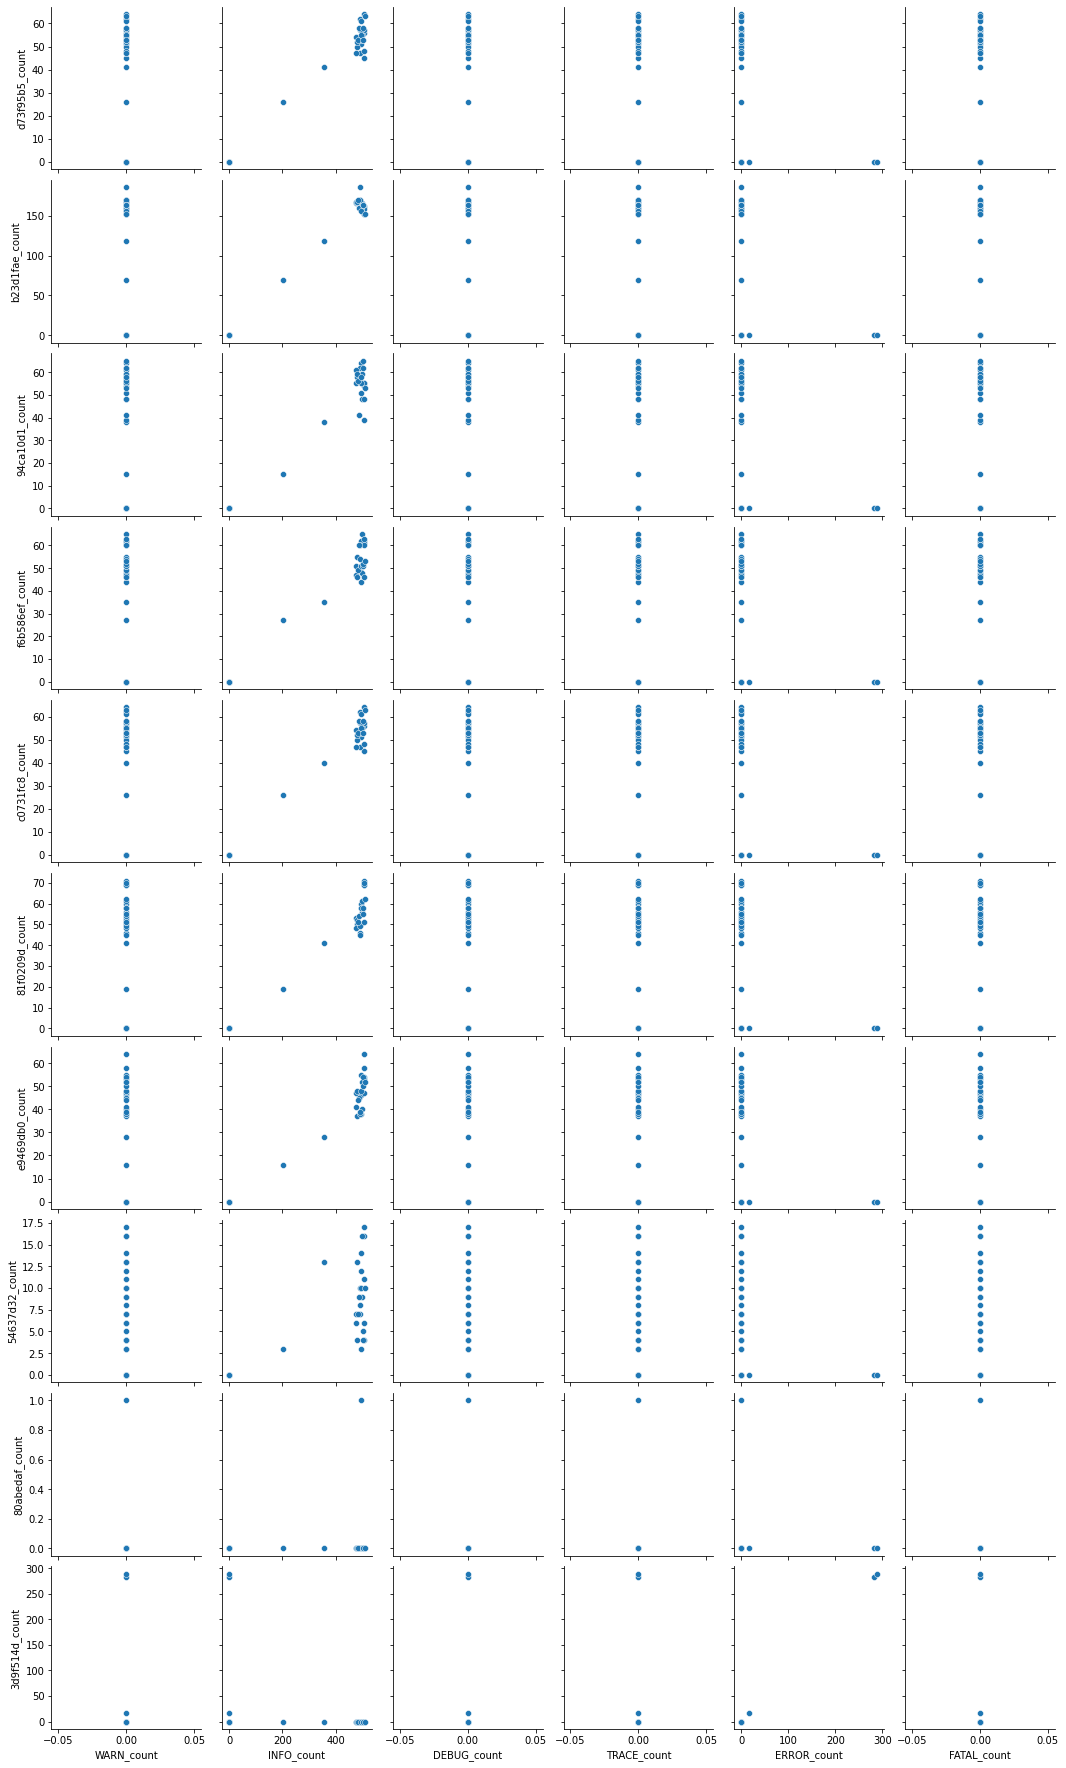

In [29]:
# Visualizing the relationship between log_levels and the event_ids

import seaborn as sns

all_columns = list(df_grouped.columns)
log_level_columns = all_columns[2:8]
event_id_columns = all_columns[8:]

sns.pairplot(df_grouped, y_vars= event_id_columns,
                  x_vars= log_level_columns)

In [30]:
# Applying Kmeans clustering to different values of k (1-15)

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
RANDOM_STATE = 123

cluster_check_range = range(1, 15)

kmeans = [None] * (len(cluster_check_range) + 1)
scores = [0] * (len(cluster_check_range) + 1)
for i in cluster_check_range:
    if i == 0:
        continue
    kmeans[i] = KMeans(n_clusters=i, random_state=RANDOM_STATE).fit(data_scaled) 
    scores[i] = kmeans[i].score(data_scaled)

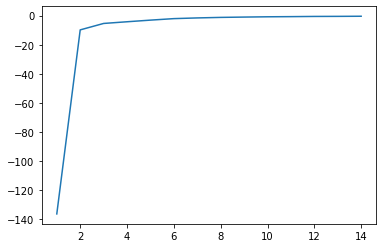

In [31]:
# Finding the elbow point

fig, ax = plt.subplots()
ax.plot(cluster_check_range, scores[1:])
plt.show()

In [32]:
# Selecting appropriate k. Here we chose k = 8

k = 2
cluster_model = kmeans[k]

df_grouped['cluster'] = cluster_model.predict(data_scaled)
df_grouped['cluster'].value_counts()
df = df_grouped['cluster'].value_counts().rename_axis('Cluster number').reset_index(name='counts')
df

,Cluster number,counts
0,0,86
1,1,24


In [37]:
# final_data - df_grouped
# data_new - data_scaled

/home/sandesh/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/sandesh/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 109 nearest neighbors...
[t-SNE] Indexed 110 samples in 0.000s...
[t-SNE] Computed neighbors for 110 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 110 / 110
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.051971
[t-SNE] KL divergence after 300 iterations: 0.126414


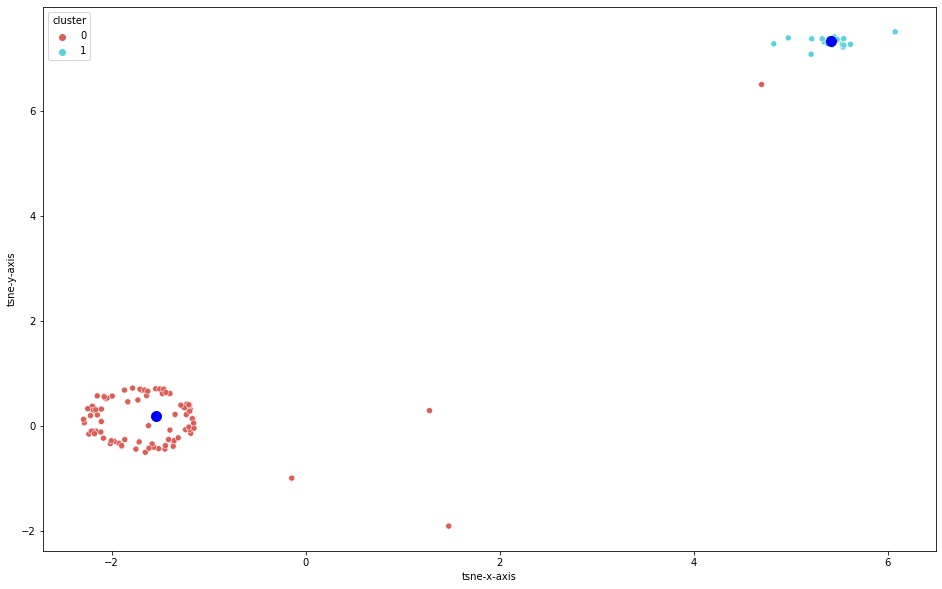

In [33]:
# Applying tSNE to visualise data in 2D

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, random_state=RANDOM_STATE)
tsne_results = tsne.fit_transform(data_scaled)

df_grouped['tsne-x-axis'] = tsne_results[:,0]
df_grouped['tsne-y-axis'] = tsne_results[:,1]
df_grouped

tsne_cluster = df_grouped.groupby('cluster').agg({'tsne-x-axis':'mean', 'tsne-y-axis':'mean'}).reset_index()

plt.figure(figsize=(16,10))

sns.scatterplot(
    x="tsne-x-axis", y="tsne-y-axis",
    hue="cluster",
    palette=sns.color_palette("hls", k),
    data=df_grouped,
    legend="full",
    alpha=1
)

plt.scatter(x="tsne-x-axis", y="tsne-y-axis", data=tsne_cluster, s=100, c='b')
plt.show()

/tmp/ipykernel_58963/1709323777.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  total_distance = pd.Series()


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  2.,  0.,  2.,  0.,  0.,  0.,  1.,  3., 82.,  2.,  0.,  1.,
         0.,  1.,  2.,  1.,  1.,  1.,  0.,  1.,  2.,  1.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([ 3.56298312,  3.63010366,  3.6972242 ,  3.76434474,  3.83146527,
         3.89858581,  3.96570635,  4.03282689,  4.09994742,  4.16706796,
         4.2341885 ,  4.30130903,  4.36842957,  4.43555011,  4.50267065,
         4.56979118,  4.63691172,  4.70403226,  4.7711528 ,  4.83827333,
         4.90539387,  4.97251441,  5.03963495,  5.10675548,  5.17387602,
         5.24099656,  5.3081171 ,  5.37523763,  5.44235817,  5.509478

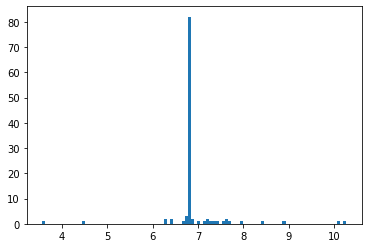

In [34]:
# Plotting histogram of sum_squared_distances of all points from the center of clusters

def get_ssd(data, cluster_model, feature_cols):
    centers = cluster_model.cluster_centers_
    points = np.asarray(data[feature_cols])
    total_distance = pd.Series()
    for i in range(len(points)):
        total_distance.at[i] = get_distance(centers, points, i)
    return total_distance  

def get_distance(centers, points, i):
    distance = 0
    for j in range(len(centers)):
        d = np.linalg.norm(points[i] - centers[j])
        distance += d**2
    return distance


centers = cluster_model.cluster_centers_
points = np.asarray(data_scaled)

df_grouped['ssd'] = get_ssd(data_scaled, cluster_model, feature_cols)

plt.hist(df_grouped['ssd'], bins=100)

<AxesSubplot:xlabel='tsne-x-axis', ylabel='tsne-y-axis'>

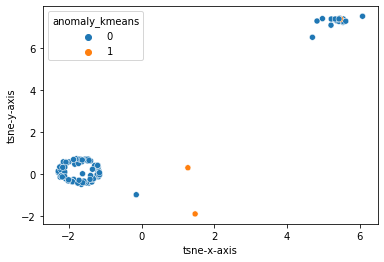

In [62]:
# Setting cutoff to ssd for anomaly

cutoff = 8.5
df_grouped['anomaly_kmeans'] = (df_grouped['ssd'] >= cutoff).astype(int)

sns.scatterplot(
    x="tsne-x-axis", y="tsne-y-axis",
    hue="anomaly_kmeans",
    data=df_grouped,
    legend="full",
    alpha=1
)


In [63]:
# Listing anomalous rows according to k-means

df_grouped.loc[df_grouped['anomaly_kmeans']==1]

,Date,total_msgs,WARN_count,INFO_count,DEBUG_count,TRACE_count,ERROR_count,FATAL_count,d73f95b5_count,b23d1fae_count,...,e9469db0_count,54637d32_count,80abedaf_count,3d9f514d_count,cluster,tsne-x-axis,tsne-y-axis,ssd,anomaly_kmeans,anomaly_isolated
20,2023-03-29 10:55:00,493,0,493,0,0,0,0,55,157,...,55,3,1,0,1,5.475832,7.372219,8.901013,1,0
107,2023-03-29 18:10:00,283,0,0,0,0,283,0,0,0,...,0,0,0,283,0,1.473236,-1.897111,10.109209,1,0
108,2023-03-29 18:15:00,289,0,0,0,0,289,0,0,0,...,0,0,0,289,0,1.274744,0.301718,10.275037,1,1


/home/sandesh/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/sandesh/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,Date,total_msgs,WARN_count,INFO_count,DEBUG_count,TRACE_count,ERROR_count,FATAL_count,d73f95b5_count,b23d1fae_count,...,e9469db0_count,54637d32_count,80abedaf_count,3d9f514d_count,cluster,tsne-x-axis,tsne-y-axis,ssd,anomaly_kmeans,anomaly_isolated
0,2023-03-29 09:15:00,354,0,354,0,0,0,0,41,118,...,28,13,0,0,1,5.358735,7.317874,4.452085,0,1
24,2023-03-29 11:15:00,202,0,202,0,0,0,0,26,70,...,16,3,0,0,0,4.697449,6.511828,3.562983,0,1
108,2023-03-29 18:15:00,289,0,0,0,0,289,0,0,0,...,0,0,0,289,0,1.274744,0.301718,10.275037,1,1
109,2023-03-29 18:20:00,17,0,0,0,0,17,0,0,0,...,0,0,0,17,0,-0.144938,-0.983476,6.781133,0,1


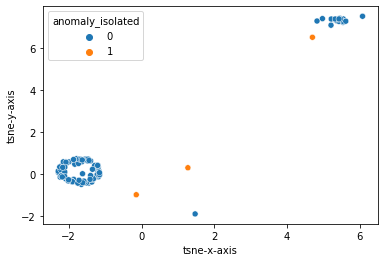

In [64]:
# Clustering using Isolated forests

from sklearn.ensemble import IsolationForest

outlier_fraction = 0.03

model =  IsolationForest(n_jobs=-1, n_estimators=200, max_features=3, random_state=RANDOM_STATE, contamination=outlier_fraction)
model.fit(data_scaled)

df_grouped['anomaly_isolated'] = pd.Series(model.predict(data_scaled))
df_grouped['anomaly_isolated'] = df_grouped['anomaly_isolated'].map( {1: 0, -1: 1} )

sns.scatterplot(
    x="tsne-x-axis", y="tsne-y-axis",
    hue="anomaly_isolated",
    data=df_grouped,
    legend="full",
    alpha=1
)

df_grouped.loc[df_grouped['anomaly_isolated']==1]

In [20]:
#Performance comparision

# to be done after testing the model on actual application logs